# Miscellaneous

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


### Set theme

(Only needs to be run once)

In [3]:
fcp.set_theme('gray')
#fcp.set_theme('white')

Previous theme file found! Renaming to "defaults_old.py" and copying new theme...done!


### Other

In [4]:
SHOW = False

## Text boxes

One or more text boxes can be added to any plot via the ``text`` ``Element`` class.  

### Single text box

First we consider a single, non-styled text box:

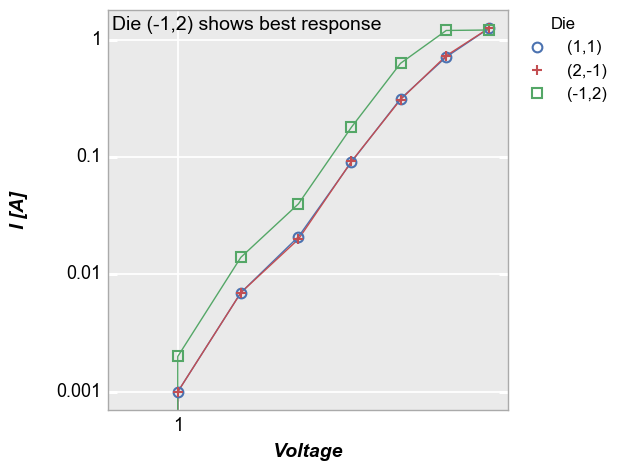

In [5]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text='Die (-1,2) shows best response', text_position=[0, 380])

### Single text box with styling

We can enhance the look of the text box by accessing color and font properties in the ``text`` object using keyword arguments or by definition in a custom theme file.  For example, to set the text box fill color, use `text_fill_color`.  The following attributes are defined by default for a text box:

* `edge_color`:  none

* `fill_color`: none

* `font`: sans-serif

* `font_size`: 14

* `font_style`: normal

* `font_weight`: normal

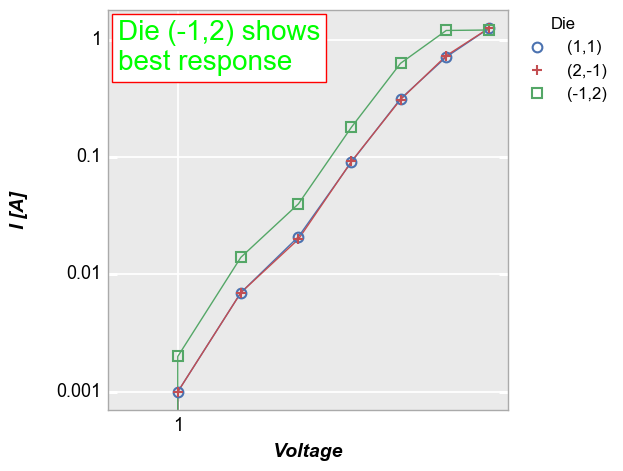

In [6]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text='Die (-1,2) shows\nbest response', text_position=[10, 340], text_font_size=20,
         text_edge_color='#FF0000', text_font_color='#00FF00', text_fill_color='#ffffff')

### Multiple text boxes

We can also add multiple text boxes.  Because each styling attribute is a `RepeatedList`, we do not have to explicitly define all attributes for each text box.  The provided list of attributes or defaults is cycled through for each text box.  Notice below that we define a custom position and font size for each text string, but only one `fill_color` and only two `font_color` values.  Because these attributes are `RepeatedList` objects, all elements share the same `fill_color` and the first and third text string share the same `font_color`.

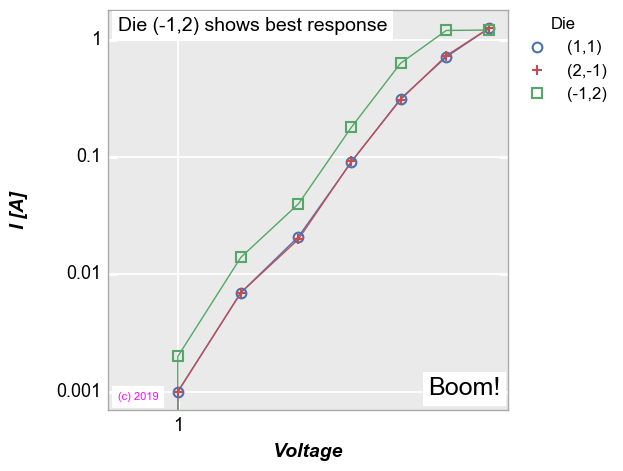

In [7]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text=['Die (-1,2) shows best response', '(c) 2019', 'Boom!'], 
         text_position=[[10, 379], [10, 10], [320, 15]], text_font_color=['#000000', '#FF00FF'],
         text_font_size=[14, 8, 18], text_fill_color='#FFFFFF')

### Position

#### Coordinate systems

Text box locations can be specified relative to different elements of a given figure:

* "axis": (0,0) is at the lower left corner of the plot window [default]

* "figure": (0,0) is at the lower left corner of the entire figure window

* "data":  position is relative to the actual x,y data coordinates

This value is toggled using the `text_coordinate` keyword.  In the examples below, notice how the `text_position` must change with each coordinate system in order to keep the text box in the same general location.

<b>By "axis" [default]</b>

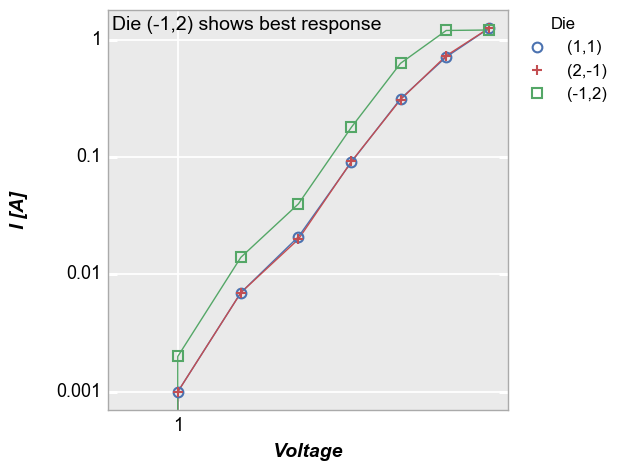

In [8]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text='Die (-1,2) shows best response', text_position=[0, 380])

<b>By "figure"</b>

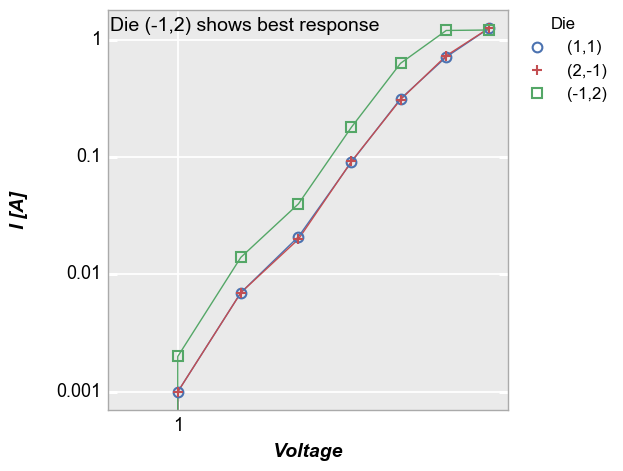

In [9]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text='Die (-1,2) shows best response', text_position=[110, 440], text_coordinate='figure')

<b>By "data"</b>

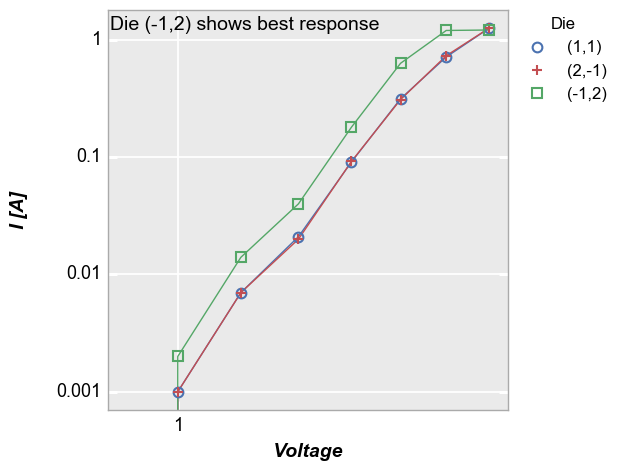

In [10]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text='Die (-1,2) shows best response', text_position=[0.903, 1.2], text_coordinate='data')

#### Units

By default, "axis" and "figure" referenced position values are units of pixels.  We can cast these into relative units between 0 and 1 (0 and 100%) of scale using the keyword `text_units`.

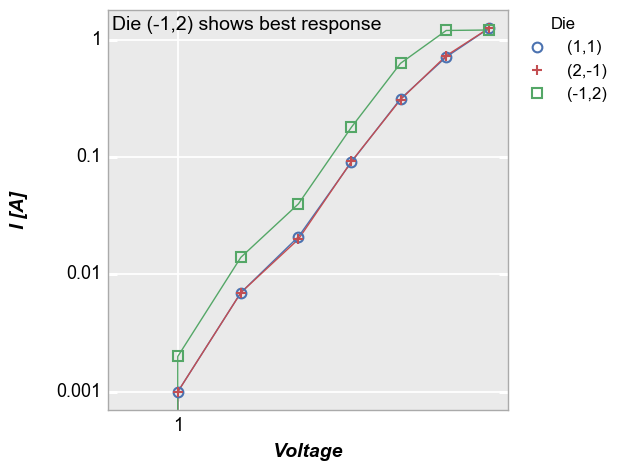

In [11]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', show=SHOW, xmin=0.9, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         text='Die (-1,2) shows best response', text_position=[0, 0.95], text_units='relative')